In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["ANTHROPIC_API_KEY"] = os.getenv("ANTHROPIC_API_KEY")

os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [2]:
from langchain_core.tools import tool
import requests

In [3]:

@tool
def get_stock_price(symbol: str) -> str:
    """
    Retrieve the latest real-time stock price for a given stock symbol.

    Parameters:
        symbol (str): The stock ticker symbol (e.g., 'AAPL' for Apple, 'GOOGL' for Alphabet, 'TSLA' for Tesla).

    Returns:
        str: A human-readable summary of the stock's current trading price and percentage change.
            If the symbol is invalid or data is unavailable, an error message will be returned.

    Example:
        >>> get_stock_price("AAPL")
        "The current stock price of AAPL is $189.56 (+0.72% change)."

    Notes:
        - Requires a valid Alpha Vantage API key stored in the environment variable 'ALPHA_VANTAGE_API_KEY'.
        - The free tier of Alpha Vantage has request limits. Be cautious with frequent use in loops or agents.
    """
    
    api_key = os.getenv("ALPHA_VANTAGE_API_KEY")
    url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    
    if response.status_code != 200:
        return f"Failed to fetch stock data: {response.text}"
    
    data = response.json()
    print(data)
    
    try:
        quote = data["Global Quote"]
        price = quote["05. price"]
        change = quote["10. change percent"]
        return f"The current stock price of {symbol} is ${price} ({change} change)."
    except KeyError:
        return "Could not find price data. Check the symbol."


In [4]:
get_stock_price.args

{'symbol': {'title': 'Symbol', 'type': 'string'}}

In [5]:
get_stock_price.description

'Retrieve the latest real-time stock price for a given stock symbol.\n\nParameters:\n    symbol (str): The stock ticker symbol (e.g., \'AAPL\' for Apple, \'GOOGL\' for Alphabet, \'TSLA\' for Tesla).\n\nReturns:\n    str: A human-readable summary of the stock\'s current trading price and percentage change.\n        If the symbol is invalid or data is unavailable, an error message will be returned.\n\nExample:\n    >>> get_stock_price("AAPL")\n    "The current stock price of AAPL is $189.56 (+0.72% change)."\n\nNotes:\n    - Requires a valid Alpha Vantage API key stored in the environment variable \'ALPHA_VANTAGE_API_KEY\'.\n    - The free tier of Alpha Vantage has request limits. Be cautious with frequent use in loops or agents.'

In [6]:
get_stock_price.invoke("AAPL")

{'Global Quote': {'01. symbol': 'AAPL', '02. open': '201.4300', '03. high': '202.6400', '04. low': '199.4600', '05. price': '201.0000', '06. volume': '50799121', '07. latest trading day': '2025-06-26', '08. previous close': '201.5600', '09. change': '-0.5600', '10. change percent': '-0.2778%'}}


'The current stock price of AAPL is $201.0000 (-0.2778% change).'

In [7]:
get_stock_price.invoke("TSLA")

{'Global Quote': {'01. symbol': 'TSLA', '02. open': '324.6100', '03. high': '331.0500', '04. low': '323.6100', '05. price': '325.7800', '06. volume': '80440907', '07. latest trading day': '2025-06-26', '08. previous close': '327.5500', '09. change': '-1.7700', '10. change percent': '-0.5404%'}}


'The current stock price of TSLA is $325.7800 (-0.5404% change).'

In [8]:

@tool
def get_weather(city: str) -> str:
    """
    Fetch the current weather conditions for a specified city.

    Parameters:
        city (str): The name of the city to retrieve weather data for (e.g., 'London', 'New York').

    Returns:
        str: A concise description of the weather including temperature and conditions.
            Returns an error message if the city is not found or the request fails.

    Example:
        >>> get_weather("Delhi")
        "The weather in Delhi is haze with a temperature of 32.5°C."

    Notes:
        - Requires a valid OpenWeatherMap API key set in the environment variable 'OPENWEATHER_API_KEY'.
        - Units are returned in metric (Celsius) by default.
    """
    
    api_key = os.getenv("OPENWEATHER_API_KEY")
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    
    if response.status_code != 200:
        return f"Failed to get weather: {response.text}"
    
    data = response.json()
    print(data)
    
    temp = data["main"]["temp"]
    desc = data["weather"][0]["description"]
    
    return f"The weather in {city} is {desc} with a temperature of {temp}°C."


In [9]:
get_weather.invoke('London')

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.01, 'feels_like': 23.82, 'temp_min': 24.01, 'temp_max': 24.01, 'pressure': 1020, 'humidity': 52, 'sea_level': 1020, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 5.52, 'deg': 234, 'gust': 7.57}, 'clouds': {'all': 60}, 'dt': 1751023998, 'sys': {'country': 'GB', 'sunrise': 1750995913, 'sunset': 1751055704}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


'The weather in London is broken clouds with a temperature of 24.01°C.'

In [10]:
# %pip install -U duckduckgo-search

In [11]:
from langchain_community.tools import DuckDuckGoSearchRun

duck_duck_go_search = DuckDuckGoSearchRun()
duck_duck_go_search

DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))

In [12]:
duck_duck_go_search.description

'A wrapper around DuckDuckGo Search. Useful for when you need to answer questions about current events. Input should be a search query.'

In [13]:
duck_duck_go_search.args

{'query': {'description': 'search query to look up',
  'title': 'Query',
  'type': 'string'}}

In [14]:
response = duck_duck_go_search.invoke("Tesla stock drop")

In [15]:
response

"Topline Shares of Tesla dropped by more than 14% on Thursday as the relationship between Elon Musk and President Donald Trump's appeared to unravel, with Musk launching attacks at the president ... Tesla stock is barreling toward a ninth-straight weekly drop, falling another 5% on Tuesday. Shares have now plummeted 53% from record highs reached in mid-December. There are two new factors ... Tesla shares fall to $241, lowest since November 2024, after a 91% rally following Trump's election. Sales decline in China and Europe, Musk's controversial views, and UBS downgrade weigh on the EV leader. Tesla's stock price tumbles 14%, erasing more than $150 billion in the automaker's value, as Elon Musk and President Trump trade barbs. Investors are losing confidence as Tesla battles falling sales, political controversies, and Musk's latest billion-dollar distraction."

In [16]:
# from langchain_groq import ChatGroq

# llm = ChatGroq(
#     model = 'deepseek-r1-distill-llama-70b',
#     temperature=0.3
# )

# llm

In [17]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model = 'gpt-4o-mini',
    temperature=0.3
)
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000025FBF23FF50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000025FBF73F620>, root_client=<openai.OpenAI object at 0x0000025FBEBA34A0>, root_async_client=<openai.AsyncOpenAI object at 0x0000025FBF23F9E0>, model_name='gpt-4o-mini', temperature=0.3, model_kwargs={}, openai_api_key=SecretStr('**********'))

#### **LLM with Tool Bind**

In [18]:
import operator
from typing import List
from langgraph.graph.message import add_messages
from pydantic import BaseModel , Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode

In [19]:
## tools
tools = [get_stock_price, get_weather, duck_duck_go_search]
tools

[StructuredTool(name='get_stock_price', description='Retrieve the latest real-time stock price for a given stock symbol.\n\nParameters:\n    symbol (str): The stock ticker symbol (e.g., \'AAPL\' for Apple, \'GOOGL\' for Alphabet, \'TSLA\' for Tesla).\n\nReturns:\n    str: A human-readable summary of the stock\'s current trading price and percentage change.\n        If the symbol is invalid or data is unavailable, an error message will be returned.\n\nExample:\n    >>> get_stock_price("AAPL")\n    "The current stock price of AAPL is $189.56 (+0.72% change)."\n\nNotes:\n    - Requires a valid Alpha Vantage API key stored in the environment variable \'ALPHA_VANTAGE_API_KEY\'.\n    - The free tier of Alpha Vantage has request limits. Be cautious with frequent use in loops or agents.', args_schema=<class 'langchain_core.utils.pydantic.get_stock_price'>, func=<function get_stock_price at 0x0000025FBEBC47C0>),
 StructuredTool(name='get_weather', description='Fetch the current weather conditio

In [20]:

llm_with_tools = llm.bind_tools(tools)
llm_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000025FBF23FF50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000025FBF73F620>, root_client=<openai.OpenAI object at 0x0000025FBEBA34A0>, root_async_client=<openai.AsyncOpenAI object at 0x0000025FBF23F9E0>, model_name='gpt-4o-mini', temperature=0.3, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'get_stock_price', 'description': 'Retrieve the latest real-time stock price for a given stock symbol.\n\nParameters:\n    symbol (str): The stock ticker symbol (e.g., \'AAPL\' for Apple, \'GOOGL\' for Alphabet, \'TSLA\' for Tesla).\n\nReturns:\n    str: A human-readable summary of the stock\'s current trading price and percentage change.\n        If the symbol is invalid or data is unavailable, an error message will be returned.\n\nExample:\n    >>> get_stock_price("AA

In [21]:
response = llm_with_tools.invoke("What is the stock price of Tesla today?")
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_w8dunk5m6x7zQiubt6qlJ56h', 'function': {'arguments': '{"symbol":"TSLA"}', 'name': 'get_stock_price'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 408, 'total_tokens': 424, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-Bn1gRmaoDSFZXenXNGDvv7Wi49Q52', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5615c068-8a4d-42c1-a964-a5fb55b3bb91-0', tool_calls=[{'name': 'get_stock_price', 'args': {'symbol': 'TSLA'}, 'id': 'call_w8dunk5m6x7zQiubt6qlJ56h', 'type': 'tool_call'}], usage_metadata={'input_tokens': 408, 'output_tokens': 16, 'total_tokens': 424, 'input_token_deta

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'z705dpjg8', 'function': {'arguments': '{"symbol":"TSLA"}', 'name': 'get_stock_price'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 186, 'prompt_tokens': 581, 'total_tokens': 767, 'completion_time': 0.990684022, 'prompt_time': 0.037159467, 'queue_time': 0.080331852, 'total_time': 1.0278434889999999}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--365c1329-0377-45db-b83c-c743fe0b0b39-0', tool_calls=[{'name': 'get_stock_price', 'args': {'symbol': 'TSLA'}, 'id': 'z705dpjg8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 581, 'output_tokens': 186, 'total_tokens': 767})

In [22]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'symbol': 'TSLA'},
  'id': 'call_w8dunk5m6x7zQiubt6qlJ56h',
  'type': 'tool_call'}]

In [23]:
def call_llm_with_tool_bind(state:MessagesState) -> dict:
    question = state["messages"]
    response = llm_with_tools.invoke(question)
    return {"messages":[response]}

In [24]:
messages = [HumanMessage(content="what is the stock price of Apple today?")]

state: MessagesState = {"messages": messages}
print(type(state))

response = call_llm_with_tool_bind(state)
print(response)

<class 'dict'>
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_shA51b7enwTBUezHGFMAQG4n', 'function': {'arguments': '{"symbol":"AAPL"}', 'name': 'get_stock_price'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 408, 'total_tokens': 424, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-Bn1gTbG5c0Ad747jmXT6sEntCYdds', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--81b6a94a-66f6-4060-93f4-4b73799d76e6-0', tool_calls=[{'name': 'get_stock_price', 'args': {'symbol': 'AAPL'}, 'id': 'call_shA51b7enwTBUezHGFMAQG4n', 'type': 'tool_call'}], usage_metadata={'input_tokens': 408, 'output_tokens': 16, 'total_to

In [25]:
response["messages"][-1].content

''

In [26]:
response["messages"][-1].tool_calls

[{'name': 'get_stock_price',
  'args': {'symbol': 'AAPL'},
  'id': 'call_shA51b7enwTBUezHGFMAQG4n',
  'type': 'tool_call'}]

In [27]:
messages = [HumanMessage(content="what is update of Iran Israel on going conflicts?")]

state: MessagesState = {"messages": messages}
print(type(state))

response = call_llm_with_tool_bind(state)
print(response)

<class 'dict'>
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8gOqjWgjC6irHkCdwPfJtwOI', 'function': {'arguments': '{"query":"Iran Israel ongoing conflicts update October 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 409, 'total_tokens': 434, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-Bn1gUkSJFOFdaYuYmZ5KeKcUpnqSo', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d3ea5b59-94d6-42fc-bf3b-2d9331281437-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Iran Israel ongoing conflicts update October 2023'}, 'id': 'call_8gOqjWgjC6irHkCdwPfJtwOI'

In [28]:
response["messages"][-1].content

''

In [29]:
response["messages"][-1].tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'Iran Israel ongoing conflicts update October 2023'},
  'id': 'call_8gOqjWgjC6irHkCdwPfJtwOI',
  'type': 'tool_call'}]

In [30]:
## build the tool nodes
tool_node = ToolNode(tools)
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'get_stock_price': StructuredTool(name='get_stock_price', description='Retrieve the latest real-time stock price for a given stock symbol.\n\nParameters:\n    symbol (str): The stock ticker symbol (e.g., \'AAPL\' for Apple, \'GOOGL\' for Alphabet, \'TSLA\' for Tesla).\n\nReturns:\n    str: A human-readable summary of the stock\'s current trading price and percentage change.\n        If the symbol is invalid or data is unavailable, an error message will be returned.\n\nExample:\n    >>> get_stock_price("AAPL")\n    "The current stock price of AAPL is $189.56 (+0.72% change)."\n\nNotes:\n    - Requires a valid Alpha Vantage API key stored in the environment variable \'ALPHA_VANTAGE_API_KEY\'.\n    - The free tier of Alpha Vantage has request limits. Be cautious with frequent use in loops or agents.', args_schema=<class 'langchain_core.utils.pydanti

In [31]:
from langgraph.prebuilt import tools_condition

In [32]:
workflow = StateGraph(MessagesState)

workflow.add_node("llm_with_tools", call_llm_with_tool_bind)

workflow.add_node("tools", tool_node)

workflow.add_edge(START,"llm_with_tools")

workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition
)

workflow.add_edge("tools","llm_with_tools")

In [33]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

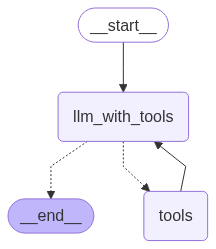

In [34]:
app = workflow.compile(checkpointer=memory)
app

In [35]:
config = {
    "configurable": {
        "thread_id": "1"
    }
}

In [36]:
events = app.stream(
    {
        "messages":["I'm planning a trip to Kolkata. Can you suggest some must-visit historical places there, and also let me know the current weather in Kolkata?"]
    },
    config=config,
    stream_mode="values"
)

In [37]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm planning a trip to Kolkata. Can you suggest some must-visit historical places there, and also let me know the current weather in Kolkata?
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_9eSDWYLjnlpeoMiAKQPZx8nA)
 Call ID: call_9eSDWYLjnlpeoMiAKQPZx8nA
  Args:
    city: Kolkata
  duckduckgo_search (call_o3uVN7Yll6pljB8uAeBf9lH8)
 Call ID: call_o3uVN7Yll6pljB8uAeBf9lH8
  Args:
    query: must-visit historical places in Kolkata
{'coord': {'lon': 88.3697, 'lat': 22.5697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.2, 'feels_like': 37.22, 'temp_min': 31.2, 'temp_max': 31.2, 'pressure': 998, 'humidity': 67, 'sea_level': 998, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 4.89, 'deg': 207, 'gust': 7.15}, 'clouds': {'all': 97}, 'dt': 1751023980,

In [38]:
messages = [HumanMessage(content="""
                        I'm planning to travel to Tokyo this weekend and want to pack accordingly. Could you tell me the current weather there, and also check if there's any major event or festival happening in Tokyo that I should know about?
                        Also, I’m thinking of investing in tech stocks before I leave. Can you tell me the current stock prices of NVIDIA, Apple, and TSMC? Based on the latest news or insights, which one seems to be getting the most attention right now?
                        """)]

events = app.stream(
    {
        "messages": messages
    },
    config=config,
    stream_mode="values"
)

In [39]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================


                        I'm planning to travel to Tokyo this weekend and want to pack accordingly. Could you tell me the current weather there, and also check if there's any major event or festival happening in Tokyo that I should know about?
                        Also, I’m thinking of investing in tech stocks before I leave. Can you tell me the current stock prices of NVIDIA, Apple, and TSMC? Based on the latest news or insights, which one seems to be getting the most attention right now?
                        
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_axNuvmB5hDg31InXmj1DaSeZ)
 Call ID: call_axNuvmB5hDg31InXmj1DaSeZ
  Args:
    city: Tokyo
  duckduckgo_search (call_HN5LQXPnQzCmlPoPZXixWvep)
 Call ID: call_HN5LQXPnQzCmlPoPZXixWvep
  Args:
    query: major events or festivals in Tokyo this weekend
  get_stock_price (call_vaIDqfSu8

In [40]:
get_stock_price.invoke('NVDA')

{'Global Quote': {'01. symbol': 'NVDA', '02. open': '155.9750', '03. high': '156.7150', '04. low': '154.0000', '05. price': '155.0200', '06. volume': '198145746', '07. latest trading day': '2025-06-26', '08. previous close': '154.3100', '09. change': '0.7100', '10. change percent': '0.4601%'}}


'The current stock price of NVDA is $155.0200 (0.4601% change).'

In [41]:
get_stock_price.invoke('TSLA')

{'Global Quote': {'01. symbol': 'TSLA', '02. open': '324.6100', '03. high': '331.0500', '04. low': '323.6100', '05. price': '325.7800', '06. volume': '80440907', '07. latest trading day': '2025-06-26', '08. previous close': '327.5500', '09. change': '-1.7700', '10. change percent': '-0.5404%'}}


'The current stock price of TSLA is $325.7800 (-0.5404% change).'

In [42]:
get_stock_price.invoke('TSM')

{'Global Quote': {'01. symbol': 'TSM', '02. open': '224.9800', '03. high': '225.2200', '04. low': '222.6956', '05. price': '224.0100', '06. volume': '7982208', '07. latest trading day': '2025-06-26', '08. previous close': '222.7400', '09. change': '1.2700', '10. change percent': '0.5702%'}}


'The current stock price of TSM is $224.0100 (0.5702% change).'

In [43]:
get_stock_price.invoke('AAPL')

{'Global Quote': {'01. symbol': 'AAPL', '02. open': '201.4300', '03. high': '202.6400', '04. low': '199.4600', '05. price': '201.0000', '06. volume': '50799121', '07. latest trading day': '2025-06-26', '08. previous close': '201.5600', '09. change': '-0.5600', '10. change percent': '-0.2778%'}}


'The current stock price of AAPL is $201.0000 (-0.2778% change).'

In [44]:
messages = [HumanMessage(content="""
                        I heard it's raining in Paris — is that true right now? Also, if I google “rainy day activities in Paris,” what’s the top suggestion? Oh, and quickly check Adobe’s stock price too — I might skip the Louvre and invest instead.
                        """)]

events = app.stream(
    {
        "messages": messages
    },
    config=config,
    stream_mode="values"
)

In [45]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================


                        I heard it's raining in Paris — is that true right now? Also, if I google “rainy day activities in Paris,” what’s the top suggestion? Oh, and quickly check Adobe’s stock price too — I might skip the Louvre and invest instead.
                        
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_f7j1SrKJvVNQmL6gCeaLa2SQ)
 Call ID: call_f7j1SrKJvVNQmL6gCeaLa2SQ
  Args:
    city: Paris
  duckduckgo_search (call_cMHS9FKExs6G1Oq1GLiEmHWL)
 Call ID: call_cMHS9FKExs6G1Oq1GLiEmHWL
  Args:
    query: rainy day activities in Paris
  get_stock_price (call_JnrriqQh1t44FfYpltpxoOUw)
 Call ID: call_JnrriqQh1t44FfYpltpxoOUw
  Args:
    symbol: ADBE
{'coord': {'lon': 2.3488, 'lat': 48.8534}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.14, 'feel

In [46]:
get_stock_price.invoke('ADBE')

{'Global Quote': {'01. symbol': 'ADBE', '02. open': '387.2000', '03. high': '389.9850', '04. low': '382.8700', '05. price': '384.9500', '06. volume': '3139666', '07. latest trading day': '2025-06-26', '08. previous close': '387.5500', '09. change': '-2.6000', '10. change percent': '-0.6709%'}}


'The current stock price of ADBE is $384.9500 (-0.6709% change).'